# Assignemnt1
## Mehrzad Mortazavi
### Part1

First, reading the data into the variables:

In [109]:
import numpy as np
import matplotlib.pyplot as plt
import pylab 

from matplotlib.legend_handler import HandlerLine2D
from numpy.linalg import inv
train =  (np.genfromtxt('Dataset_1_train.csv', delimiter=',',dtype=float))[:,0:2]
val   =  (np.genfromtxt('Dataset_1_valid.csv', delimiter=',',dtype=float))[:,0:2]
test  =  (np.genfromtxt('Dataset_1_test.csv', delimiter=',', dtype=float))[:,0:2]

In [110]:
print train.shape
print val.shape
print test.shape

(50, 2)
(50, 2)
(50, 2)


### Retrieving Data(X) and target(Y) from datasets:

In [111]:
X = train[:,0:1]
Y = train[:,1:2]

Xv = val[:,0:1]
Yv = val[:,1:2]
Xt = test[:,0:1]
Yt = test[:,1:2]

## Plotting data points

In [112]:
#Plotting data

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.set_title('Data and fitting line')
ax.scatter(x=X,y=Y,label='Training Data')
ax.scatter(x=Xv,y=Yv,label='Validation Data',color='green')
ax.set_xlabel('Data')
ax.set_ylabel('Target')
ax.legend(loc='best');
#plt.show()

### Generating 20th order X

In [113]:
myX = np.ones((X.shape[0],21), dtype=np.float)
for i in range(21):
    myX[:,i] =  np.power(X, 20-i).ravel()
X = myX

myXv = np.ones((Xv.shape[0],21), dtype=np.float)
for i in range(21):
    myXv[:,i] =  np.power(Xv, 20-i).ravel()
Xv = myXv

## Computing estimaged W and Y

In [114]:
W1 = inv(np.dot(X.T,X))
W2 = np.dot(X.T,Y)
W = np.dot(W1,W2)
Yestimated  = np.dot(X,W)
YestimatedV = np.dot(Xv,W)

In [115]:
Xrange = np.arange(np.amin(X),np.amax(X),0.01)
myX = np.ones((Xrange.shape[0],21), dtype=np.float)
for i in range(21):
    myX[:,i] =  np.power(Xrange, 20-i).ravel()
YNew = np.dot(myX,W)

### Computing MSE

In [116]:
MSEtrain      = np.dot((Y-Yestimated).T, (Y-Yestimated))/Y.shape[0]
MSEvalidation = np.dot((Yv-YestimatedV).T, (Yv-YestimatedV))/Yv.shape[0]
print MSEtrain
print MSEvalidation

[[ 6.47476625]]
[[ 1420.17935747]]


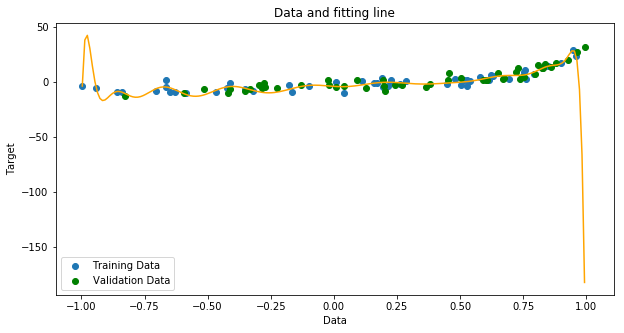

In [117]:
plt.plot(Xrange, YNew,color='orange',label='Our Fitting Line')

plt.show()

# Ridge

In [153]:
steps = 20
Lamda = np.arange(0,1,1.0/steps)
Wridge = np.zeros((steps,21), dtype=float)
YRidge = np.zeros((steps,50), dtype=float)
YRidgeV = np.zeros((steps,50), dtype=float)

MSEtrainRidge      = np.zeros((steps,), dtype=float)
MSEvalidationRidge = np.zeros((steps,), dtype=float)

print Lamda
for i in range(steps):
    W1 = inv(np.dot(X.T,X)+np.dot(Lamda[i],np.identity(21)))
    W2 = np.dot(X.T,Y)
    Wridge[i,:]  = np.dot(W1,W2).ravel()
    YRidge[i,:]  = np.dot(X,Wridge[i])
    YRidgeV[i,:] = np.dot(Xv,Wridge[i])
    MSEtrainRidge[i] = np.dot((Y-YRidge[i:i+1,:].T).T, (Y-YRidge[i:i+1,:].T)).ravel()
    MSEvalidationRidge[i] = np.dot((Yv-YRidgeV[i:i+1,:].T).T, (Yv-YRidgeV[i:i+1,:].T)).ravel()


MSEtrainRidge      = MSEtrainRidge/Y.shape[0];
MSEvalidationRidge = MSEvalidationRidge/Yv.shape[0]

print "MSEtrainRidge is"
print MSEtrainRidge
print

print "MSEvalidationRidge"
print MSEvalidationRidge
print 



[ 0.    0.05  0.1   0.15  0.2   0.25  0.3   0.35  0.4   0.45  0.5   0.55
  0.6   0.65  0.7   0.75  0.8   0.85  0.9   0.95]
MSEtrainRidge is
[ 6.47476625  8.93769149  8.99721275  9.02705417  9.04593155  9.05975922
  9.07098786  9.08081431  9.08989103  9.0986026   9.10718914  9.11580723
  9.12456237  9.13352738  9.14275344  9.15227692  9.16212375  9.17231241
  9.18285592  9.19376321]

MSEvalidationRidge
[ 1420.17935747     9.19337439     9.29160515     9.35414911     9.39703715
     9.42913141     9.45492204     9.47686213     9.49638992     9.51439805
     9.53146623     9.54798498     9.56422531     9.58037986     9.59658836
     9.61295371     9.62955274     9.64644331     9.6636693      9.68126412]



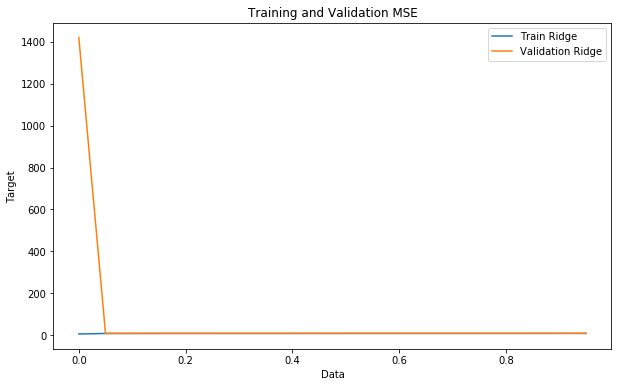

In [150]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.set_title('Training and Validation MSE')
plt.plot(Lamda,MSEtrainRidge,      label="Train Ridge"     )
plt.plot(Lamda,MSEvalidationRidge, label="Validation Ridge")
ax.set_xlabel('Data')
ax.set_ylabel('Target')
ax.legend(loc='best')
plt.show()

## Finding and plotting best fitting line based on argmin of MSEValidatoin

In [157]:
bestFit = np.argmin(MSEvalidationRidge)
YNew = np.dot(myX,Wridge[bestFit])
print "bestFit index is %d"%bestFit
print "lamda is %.2f"%Lamda[bestFit]

bestFit index is 1
lamda is 0.05


In [170]:
myXt = np.ones((Xt.shape[0],21), dtype=np.float)
for i in range(21):
    myXt[:,i] =  np.power(Xt, 20-i).ravel()
Ytest = np.dot(myXt,Wridge[bestFit]).reshape(50,1)
MSEtest = np.dot((Yt-Ytest).T, (Yt-Ytest))/Yt.shape[0]
print MSEtest

(50, 1)
(50, 1)
[[ 10.61364362]]


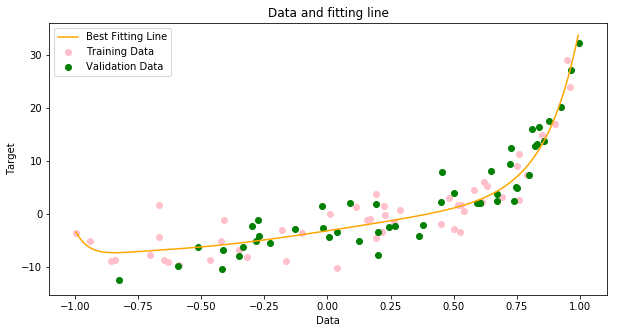

In [158]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.set_title('Data and fitting line')
ax.scatter(train[:,0:1],train[:,1:2],label='Training Data',color='pink')
ax.scatter(val[:,0:1],val[:,1:2],label='Validation Data',color='green')
plt.plot(Xrange, YNew,color='orange',label='Best Fitting Line')
ax.set_xlabel('Data')
ax.set_ylabel('Target')
ax.legend(loc='best');
plt.show()